In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [38]:
#1. Load the dataset into python environment
titanic_df=pd.read_csv('/content/titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
#2 Make 'PassengerId' as the index column
titanic_df.set_index('PassengerId', inplace=True)
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [36]:
#3 Check the basic details of the dataset
print("Dataset Shape:", titanic_df.shape)
print("Dataset Columns:", titanic_df.columns)
print("Dataset Info:\n", titanic_df.info())
print("Dataset Description:\n", titanic_df.describe())

Dataset Shape: (892, 8)
Dataset Columns: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    float64
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    float64
 4   Parch     891 non-null    float64
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
 7   Survived  891 non-null    float64
dtypes: float64(8)
memory usage: 55.9 KB
Dataset Info:
 None
Dataset Description:
            Pclass         Sex         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.654321    0.352413    0.516862    0.170595    0.063599    0.366375   
std      0.418036    0.47799

In [40]:
#missing values

titanic_df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [41]:
# Fill in all the missing values present in all the columns in the dataset

def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            df[column] = df[column].fillna(df[column].mean())
    return df

titanic_df = fill_missing_values(titanic_df)
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S


In [42]:
titanic_df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


Outliers


<function matplotlib.pyplot.show(close=None, block=None)>

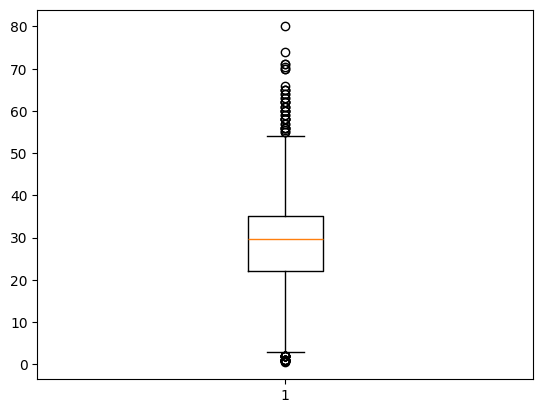

In [43]:
plt.boxplot(titanic_df['Age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

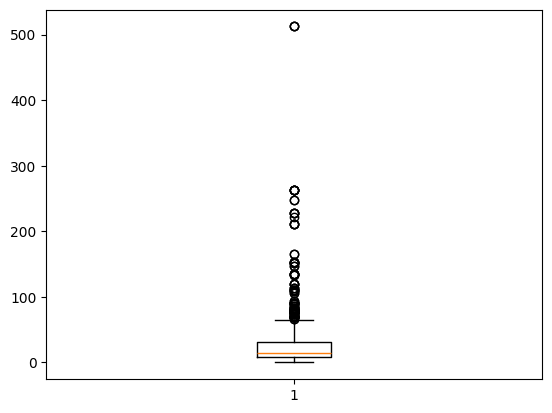

In [45]:
plt.boxplot(titanic_df['Fare'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

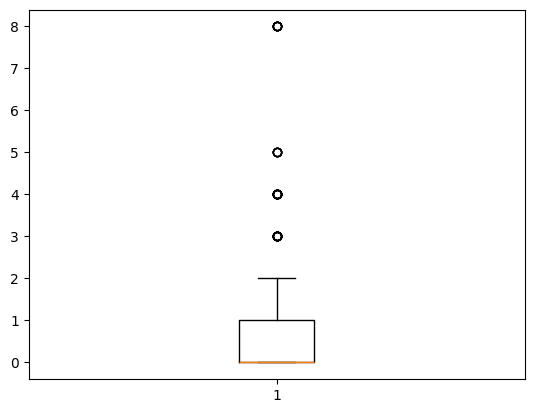

In [46]:
plt.boxplot(titanic_df['SibSp'])
plt.show

In [29]:
# Check and handle outliers in at least 3 columns in the dataset
def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

columns = ['Age', 'Fare', 'SibSp']
titanic_df = handle_outliers(titanic_df, columns)
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0,PC 17599,65.6344,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0.0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0.0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,2,W./C. 6607,23.4500,B96 B98,S


In [31]:
# Encode categorical variables
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Do min-max scaling on the feature set (Take 'Survived' as target)
def min_max_scaling(df, target):
    X = df.drop([target, 'Name', 'Ticket', 'Cabin'], axis=1)
    y = df[target]
    scaler = MinMaxScaler()
    scaled_X = scaler.fit_transform(X)
    scaled_X_df = pd.DataFrame(scaled_X, columns=X.columns)
    scaled_df = pd.concat([scaled_X_df, y], axis=1)
    return scaled_df

target = 'Survived'
titanic_df = min_max_scaling(titanic_df, target)

print("Scaled Dataset:\n", titanic_df.head())

Scaled Dataset:
    Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  Survived
0     1.0  0.0  0.375000    0.4    0.0  0.110460       0.0       NaN
1     0.0  1.0  0.682692    0.4    0.0  1.000000       0.5       0.0
2     1.0  1.0  0.451923    0.0    0.0  0.120745       0.0       1.0
3     0.0  1.0  0.625000    0.4    0.0  0.809027       0.0       1.0
4     1.0  0.0  0.625000    0.0    0.0  0.122649       0.0       1.0
